In [1]:
import pandas as pd

# Read the data
openpl = pd.read_csv('openpowerlifting.csv', dtype=object, low_memory=False)

# Define the columns to be removed
columns_to_remove = [
    'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg',
    'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg',
    'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg' ]

# Remove the specified columns
openpl.drop(columns=columns_to_remove, inplace=True)

# Filter rows based on specified criteria for USPA and USAPL
uspa_criteria = ((openpl['Federation'] == 'USPA') & 
                 (openpl['Country'] == 'USA') & 
                 (openpl['State'] == 'IL') & 
                 (openpl['Event'] == 'SBD') & 
                 (openpl['Equipment'] == 'Raw') & 
                 (openpl['Division'] == 'Open') &      
                 (~openpl['Place'].isin(['DQ', 'DD'])))

usapl_criteria = ((openpl['Federation'] == 'USAPL') & 
                  (openpl['Country'] == 'USA') & 
                  (openpl['State'] == 'IL') & 
                  (openpl['Event'] == 'SBD') & 
                  (openpl['Equipment'] == 'Raw') & 
                  ((openpl['Division'] == 'FR-O') | (openpl['Division'] == 'MR-O')) &      
                  (~openpl['Place'].isin(['DQ', 'DD'])))

# Apply the filters and concatenate the tables
merged_table = pd.concat([openpl.loc[uspa_criteria], openpl.loc[usapl_criteria]])

# Convert selected columns to float data type
columns_to_convert = ['Age', 'BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 
                      'TotalKg', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift']
merged_table[columns_to_convert] = merged_table[columns_to_convert].astype(float)

# Convert 'Place' column to integer
merged_table['Place'] = merged_table['Place'].astype(int)

# Adjust display settings to show all columns
#pd.set_option('display.max_columns', None)


# Replace NaN values with '' for object columns
object_columns = merged_table.select_dtypes(include='object').columns
merged_table[object_columns] = merged_table[object_columns].fillna('')

# Replace NaN values with 0 for integer and float columns
numerical_columns = merged_table.select_dtypes(include=['int', 'float']).columns
merged_table[numerical_columns] = merged_table[numerical_columns].fillna(0)

# Delete rows where 'AgeClass' is blank
# merged_table.dropna(subset=['AgeClass'], inplace=True)
# Delete rows where 'AgeClass' is ''
merged_table = merged_table[merged_table['AgeClass'] != '']
#print(merged_table['AgeClass'].unique())

merged_table['Date'] = pd.to_datetime(merged_table['Date'])
# Display the first 40 rows of the DataFrame
# Extract year from 'Date' column and create a new column
merged_table['Year'] = merged_table['Date'].dt.year
# Get the index of the 'Date' column
date_index = openpl.columns.get_loc('Date')

# Convert 'AgeClass' to categorical data type
#merged_table['AgeClass'] = merged_table['AgeClass'].astype('category')

# Export the merged DataFrame as a new CSV file
merged_table.to_csv('merged_data_v1.csv', index=False)
merged_table.head()



,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,Sanctioned,Year
335584,Abby Citrin,F,SBD,Raw,28.5,24-34,24-39,FR-O,62.0,63,...,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,2018
335585,Sarah Cupp,F,SBD,Raw,35.5,35-39,24-39,FR-O,66.4,72,...,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,2018
335589,Stephanie Vasquez,F,SBD,Raw,35.5,35-39,24-39,FR-O,103.2,84+,...,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,2018
335604,Jacob Pezzuto,M,SBD,Raw,25.5,24-34,24-39,MR-O,82.2,83,...,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,2018
335606,Eddie Cupp,M,SBD,Raw,36.5,35-39,24-39,MR-O,74.6,83,...,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,2018


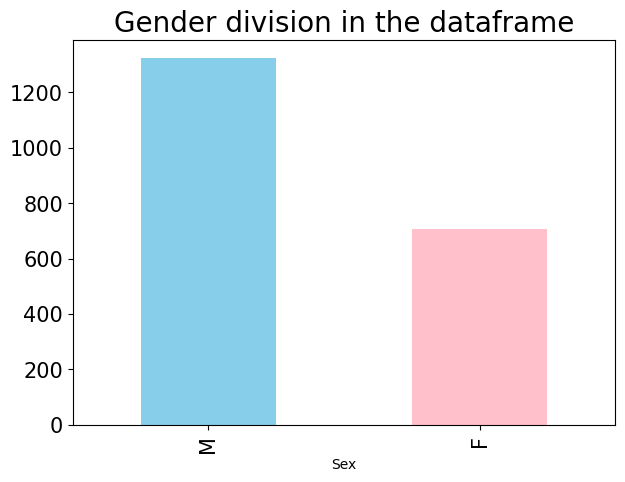

Percentage of Male lifters: 65%

Percentage of Female lifters: 35%

Sex
M    1323
F     708
Name: count, dtype: int64


In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
colors = ['skyblue', 'pink']
merged_table['Sex'].value_counts().plot(kind='bar', color=colors)
plt.title('Gender division in the dataframe',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print('Percentage of Male lifters: {}%\n'.format(round(len(merged_table[merged_table['Sex']=='M'])/len(merged_table)*100),4))
print('Percentage of Female lifters: {}%\n'.format(round(len(merged_table[merged_table['Sex']=='F'])/len(merged_table)*100),4))
print(merged_table['Sex'].value_counts())

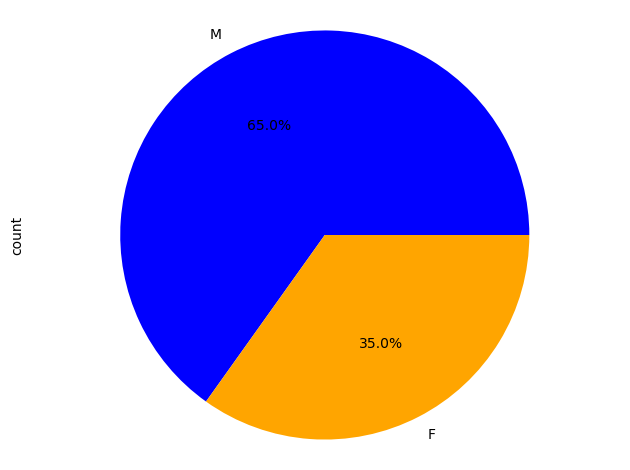

In [3]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import pandas as pd
import matplotlib.pyplot as plt
import math
# Assuming you have a DataFrame named df with a column 'Sex' indicating the gender of mice

# Count the number of mice for each gender
gender_counts = merged_table['Sex'].value_counts()

# Create a pie plot using Pandas built-in plot function
gender_counts.plot(kind='pie', autopct=lambda x: f'{int(x + 0.5):.1f}%', colors=['blue', 'orange'], startangle=0)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.tight_layout()
plt.show()

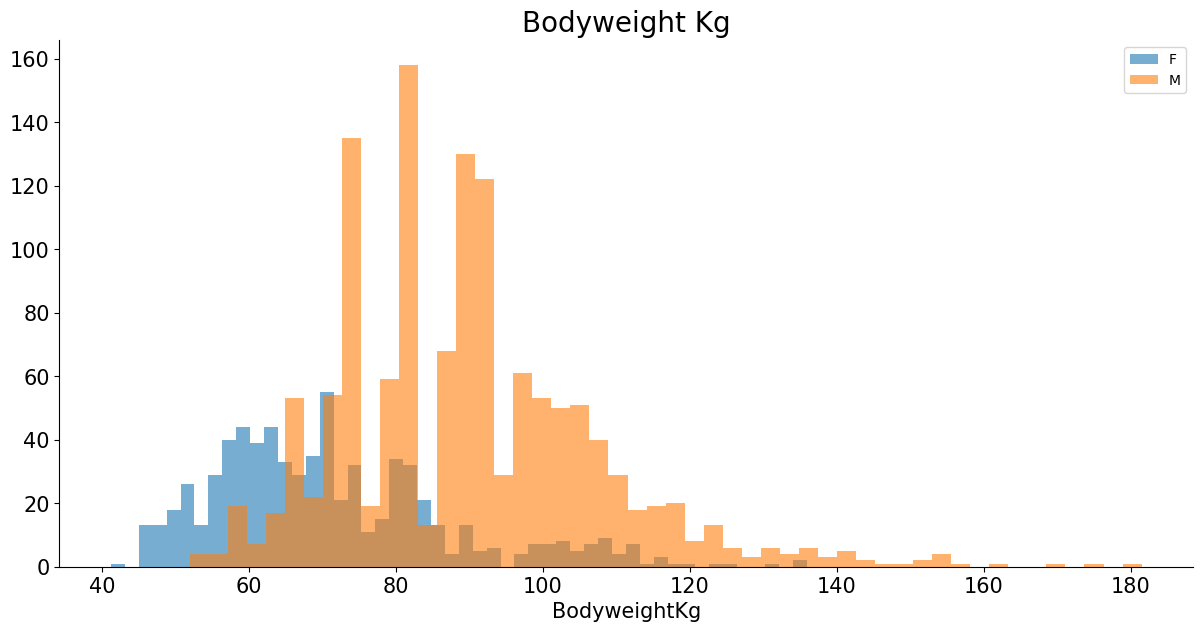

In [4]:
import seaborn as sns
g = sns.FacetGrid(merged_table,hue='Sex',height=6,aspect=2,legend_out=True)
g = g.map(plt.hist,'BodyweightKg',bins=50,alpha=.6)
plt.title('Bodyweight Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.legend(loc=1)
plt.show()

AgeClass
24-34    208
20-23     98
35-39     27
18-19     16
45-49      6
dtype: int64


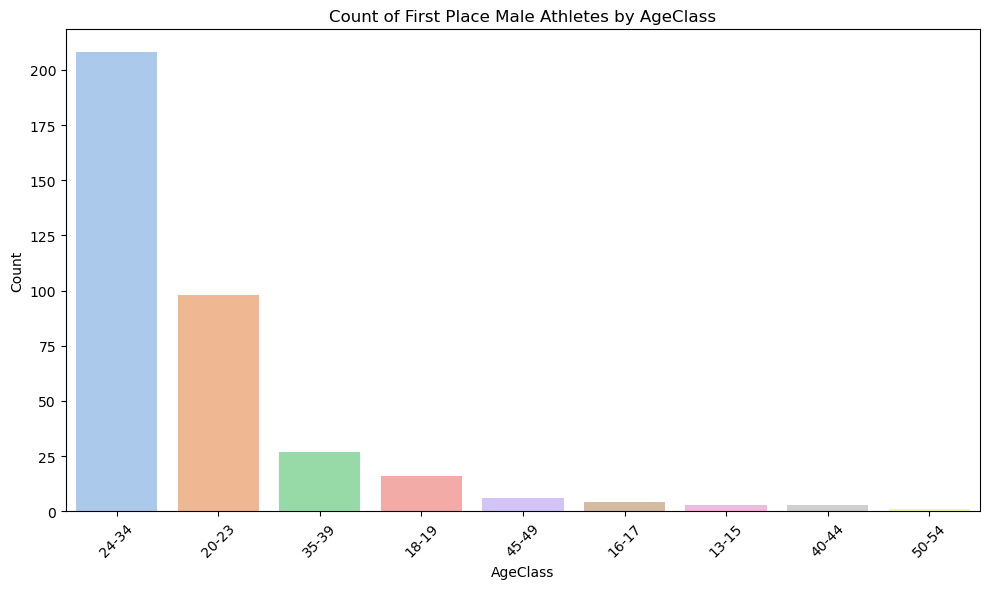

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filter rows with non-blank 'AgeClass'
firstPlace = merged_table[(merged_table.Place == 1) & (merged_table.AgeClass != '')]
firstPlace = merged_table[(merged_table.Place == 1)]
firstPlaceMale = firstPlace[(firstPlace.Sex == 'M')]
firstPlaceFemale = firstPlace[(firstPlace.Sex == 'F')]

# Count values for each AgeClass
ageclass_counts = firstPlaceMale.groupby('AgeClass').size()

# Sort AgeClass counts in descending order
ageclass_counts = ageclass_counts.sort_values(ascending=False)

# Display the count values for each AgeClass
print(ageclass_counts.head())

# Use a pastel color palette from seaborn
pastel_palette = sns.color_palette("pastel")

# Create a bar chart with pastel colors
plt.figure(figsize=(10, 6))
sns.barplot(x=ageclass_counts.index, y=ageclass_counts.values, palette=pastel_palette)
plt.title('Count of First Place Male Athletes by AgeClass')
plt.xlabel('AgeClass')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()



AgeClass
24-34    187
20-23     36
35-39     17
18-19     13
16-17      8
Name: count, dtype: int64


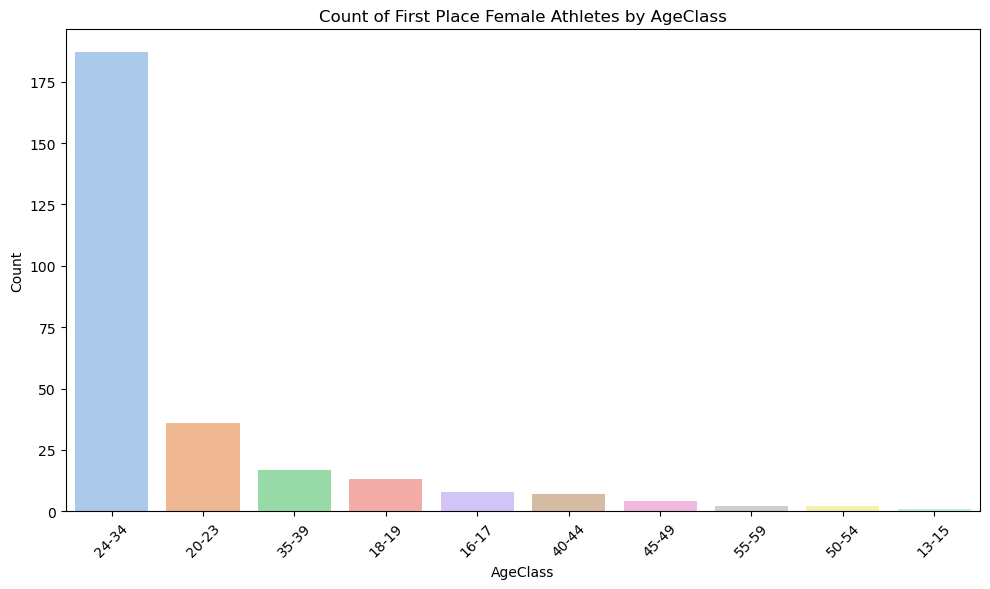

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

firstPlace = merged_table[(merged_table.Place == 1)]
firstPlaceMale = firstPlace[(firstPlace.Sex == 'M')]
firstPlaceFemale = firstPlace[(firstPlace.Sex == 'F')]

# Count values for each AgeClass for females
female_ageclass_counts = firstPlaceFemale['AgeClass'].value_counts()

# Display the count values for each AgeClass
print(female_ageclass_counts.head())

# Sort AgeClass counts in descending order
female_ageclass_counts = female_ageclass_counts.sort_values(ascending=False)

# Use a pastel color palette from seaborn
pastel_palette = sns.color_palette("pastel")

# Create a bar chart with pastel colors for female athletes
plt.figure(figsize=(10, 6))
sns.barplot(x=female_ageclass_counts.index, y=female_ageclass_counts.values, palette=pastel_palette)
plt.title('Count of First Place Female Athletes by AgeClass')
plt.xlabel('AgeClass')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()


   AgeClass  Male_Avg_squat  Female_Avg_squat
0     13-15      136.388889        142.500000
1     16-17      161.969697        143.076923
2     18-19      187.333333        111.379310
3     20-23      201.767089        119.420548
4     24-34      209.313926        120.438969
5     35-39      205.914634        117.931343
6     40-44      213.958333        104.666667
7     45-49      195.147059        102.250000
8     50-54      189.642857         85.000000
9     55-59      149.600000         92.812500
10    65-69        0.000000         52.500000


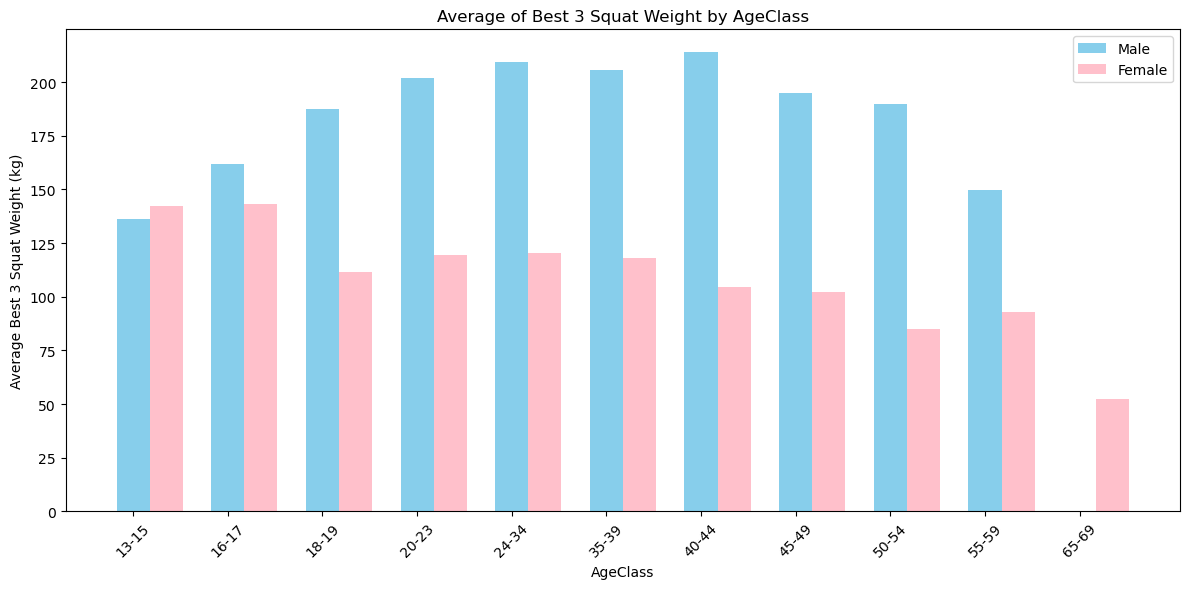

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Delete rows where 'AgeClass' is blank
merged_table.dropna(subset=['AgeClass'], inplace=True)

# Filter male athletes
male_athletes = merged_table[(merged_table.Sex == 'M')]

# Calculate the average of 'Best3SquatKg' for male athletes
male_avg_squat = male_athletes.groupby('AgeClass')['Best3SquatKg'].mean()

# Filter female athletes
female_athletes = merged_table[(merged_table.Sex == 'F')]

# Calculate the average of 'Best3SquatKg' for female athletes
female_avg_squat = female_athletes.groupby('AgeClass')['Best3SquatKg'].mean()

# Get all unique AgeClasses
all_age_classes = sorted(set(male_avg_squat.index) | set(female_avg_squat.index))

# Reindex average series with all AgeClasses
male_avg_squat = male_avg_squat.reindex(all_age_classes, fill_value=0)
female_avg_squat = female_avg_squat.reindex(all_age_classes, fill_value=0)

# Combine male and female average data into a single DataFrame
average_data = pd.DataFrame({
    'AgeClass': all_age_classes,
    'Male_Avg_squat': male_avg_squat.values,
    'Female_Avg_squat': female_avg_squat.values
})
# Delete rows where 'AgeClass' is ''
average_data = average_data[average_data['AgeClass'] != '']

# Display the updated DataFrame
print(average_data)

# Plotting
plt.figure(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.35

# Define the positions for male and female bars on the x-axis
male_positions = range(len(male_avg_squat))
female_positions = [pos + bar_width for pos in male_positions]

# Plot bars for male athletes
plt.bar(male_positions, male_avg_squat.values, width=bar_width, color='skyblue', label='Male')

# Plot bars for female athletes
plt.bar(female_positions, female_avg_squat.values, width=bar_width, color='pink', label='Female')

# Add labels and title
plt.xlabel('AgeClass')
plt.ylabel('Average Best 3 Squat Weight (kg)')
plt.title('Average of Best 3 Squat Weight by AgeClass')
plt.xticks(male_positions, all_age_classes, rotation=45)  # Set x-axis tick positions and labels

# Add legend
plt.legend()

plt.tight_layout()
plt.show()


   AgeClass  Male_Avg_Bench  Female_Avg_Bench
0     13-15       78.055556         82.500000
1     16-17      101.287879         76.538462
2     18-19      114.666667         63.017241
3     20-23      127.842405         64.453425
4     24-34      138.513528         64.701237
5     35-39      138.750000         64.511940
6     40-44      151.250000         60.333333
7     45-49      140.147059         63.750000
8     50-54      129.642857         50.833333
9     55-59      108.866667         58.125000
10    65-69        0.000000         45.000000


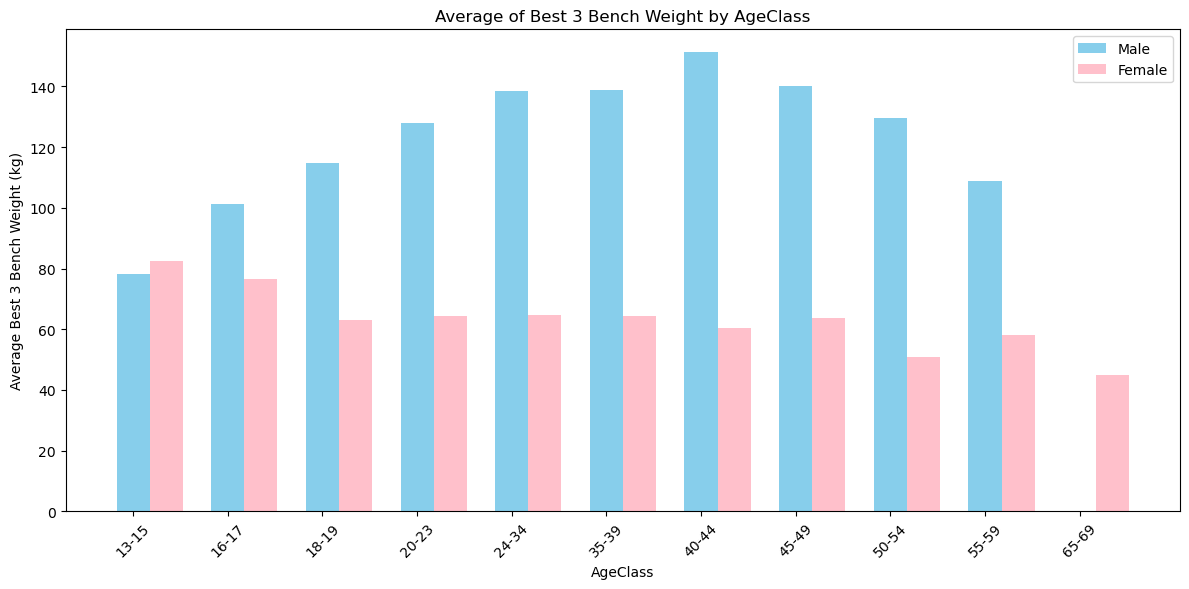

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Delete rows where 'AgeClass' is blank
merged_table.dropna(subset=['AgeClass'], inplace=True)

# Filter male athletes
male_athletes = merged_table[(merged_table.Sex == 'M')]

# Calculate the average of 'Best3BenchKg' for male athletes
male_avg_bench = male_athletes.groupby('AgeClass')['Best3BenchKg'].mean()

# Filter female athletes
female_athletes = merged_table[(merged_table.Sex == 'F')]

# Calculate the average of 'Best3BenchKg' for female athletes
female_avg_bench = female_athletes.groupby('AgeClass')['Best3BenchKg'].mean()

# Get all unique AgeClasses
all_age_classes = sorted(set(male_avg_bench.index) | set(female_avg_bench.index))

# Reindex average series with all AgeClasses
male_avg_bench = male_avg_bench.reindex(all_age_classes, fill_value=0)
female_avg_bench = female_avg_bench.reindex(all_age_classes, fill_value=0)

# Combine male and female average data into a single DataFrame
average_data = pd.DataFrame({
    'AgeClass': all_age_classes,
    'Male_Avg_Bench': male_avg_bench.values,
    'Female_Avg_Bench': female_avg_bench.values
})
# Delete rows where 'AgeClass' is ''
average_data = average_data[average_data['AgeClass'] != '']

# Display the updated DataFrame
print(average_data)

# Plotting
plt.figure(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.35

# Define the positions for male and female bars on the x-axis
male_positions = range(len(male_avg_bench))
female_positions = [pos + bar_width for pos in male_positions]

# Plot bars for male athletes
plt.bar(male_positions, male_avg_bench.values, width=bar_width, color='skyblue', label='Male')

# Plot bars for female athletes
plt.bar(female_positions, female_avg_bench.values, width=bar_width, color='pink', label='Female')

# Add labels and title
plt.xlabel('AgeClass')
plt.ylabel('Average Best 3 Bench Weight (kg)')
plt.title('Average of Best 3 Bench Weight by AgeClass')
plt.xticks(male_positions, all_age_classes, rotation=45)  # Set x-axis tick positions and labels

# Add legend
plt.legend()

plt.tight_layout()
plt.show()


   AgeClass  Male_Avg_deadlift  Female_Avg_deadlift
0     13-15         159.722222           170.000000
1     16-17         188.409091           157.884615
2     18-19         213.888889           137.586207
3     20-23         229.825633           139.756164
4     24-34         239.279310           143.356082
5     35-39         234.969512           138.292537
6     40-44         248.125000           126.666667
7     45-49         220.294118           133.750000
8     50-54         220.714286           107.083333
9     55-59         190.633333           115.937500
10    65-69           0.000000            60.000000


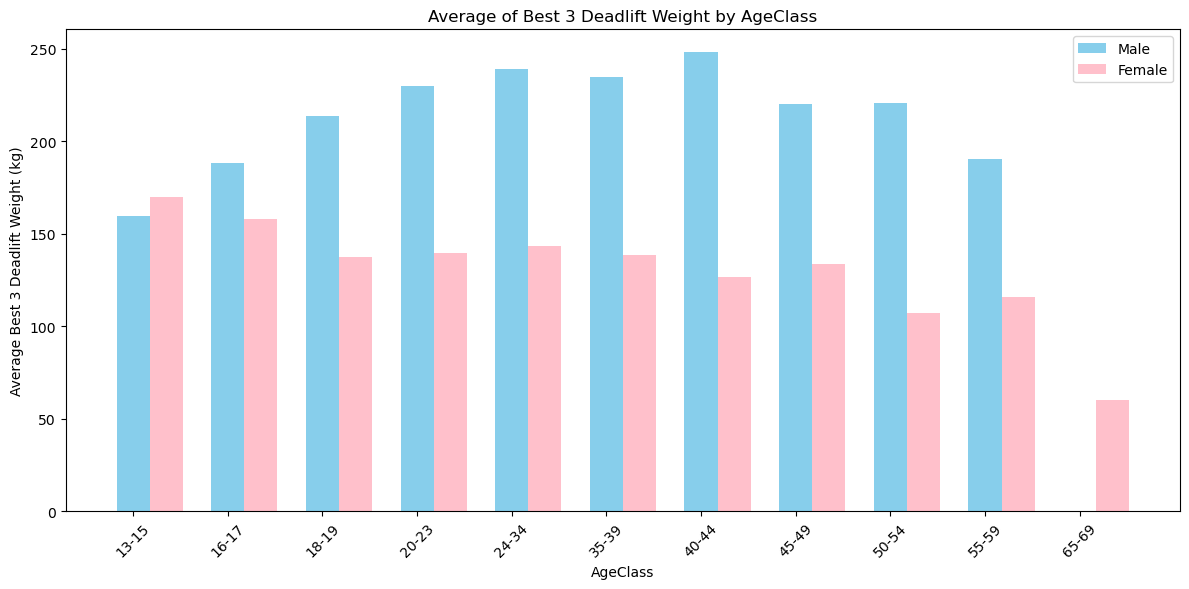

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Delete rows where 'AgeClass' is blank
merged_table.dropna(subset=['AgeClass'], inplace=True)

# Filter male athletes
male_athletes = merged_table[(merged_table.Sex == 'M')]

# Calculate the average of 'Best3DeadliftKg' for male athletes
male_avg_deadlift = male_athletes.groupby('AgeClass')['Best3DeadliftKg'].mean()

# Filter female athletes
female_athletes = merged_table[(merged_table.Sex == 'F')]

# Calculate the average of 'Best3DeadliftKg' for female athletes
female_avg_deadlift = female_athletes.groupby('AgeClass')['Best3DeadliftKg'].mean()

# Get all unique AgeClasses
all_age_classes = sorted(set(male_avg_deadlift.index) | set(female_avg_deadlift.index))

# Reindex average series with all AgeClasses
male_avg_deadlift = male_avg_deadlift.reindex(all_age_classes, fill_value=0)
female_avg_deadlift = female_avg_deadlift.reindex(all_age_classes, fill_value=0)

# Combine male and female average data into a single DataFrame
average_data = pd.DataFrame({
    'AgeClass': all_age_classes,
    'Male_Avg_deadlift': male_avg_deadlift.values,
    'Female_Avg_deadlift': female_avg_deadlift.values
})
# Delete rows where 'AgeClass' is ''
average_data = average_data[average_data['AgeClass'] != '']

# Display the updated DataFrame
print(average_data)

# Plotting
plt.figure(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.35

# Define the positions for male and female bars on the x-axis
male_positions = range(len(male_avg_deadlift))
female_positions = [pos + bar_width for pos in male_positions]

# Plot bars for male athletes
plt.bar(male_positions, male_avg_deadlift.values, width=bar_width, color='skyblue', label='Male')

# Plot bars for female athletes
plt.bar(female_positions, female_avg_deadlift.values, width=bar_width, color='pink', label='Female')

# Add labels and title
plt.xlabel('AgeClass')
plt.ylabel('Average Best 3 Deadlift Weight (kg)')
plt.title('Average of Best 3 Deadlift Weight by AgeClass')
plt.xticks(male_positions, all_age_classes, rotation=45)  # Set x-axis tick positions and labels

# Add legend
plt.legend()

plt.tight_layout()
plt.show()


    Year Sex  Count
0   2012   M      1
1   2013   F      3
2   2013   M      4
3   2015   F      6
4   2015   M      1
5   2016   F     91
6   2016   M    141
7   2017   F    104
8   2017   M    158
9   2018   F    110
10  2018   M    126
11  2019   F    111
12  2019   M    210
13  2020   F     30
14  2020   M     41
15  2021   F     48
16  2021   M    131
17  2022   F     86
18  2022   M    239
19  2023   F     86
20  2023   M    223
21  2024   F     33
22  2024   M     48


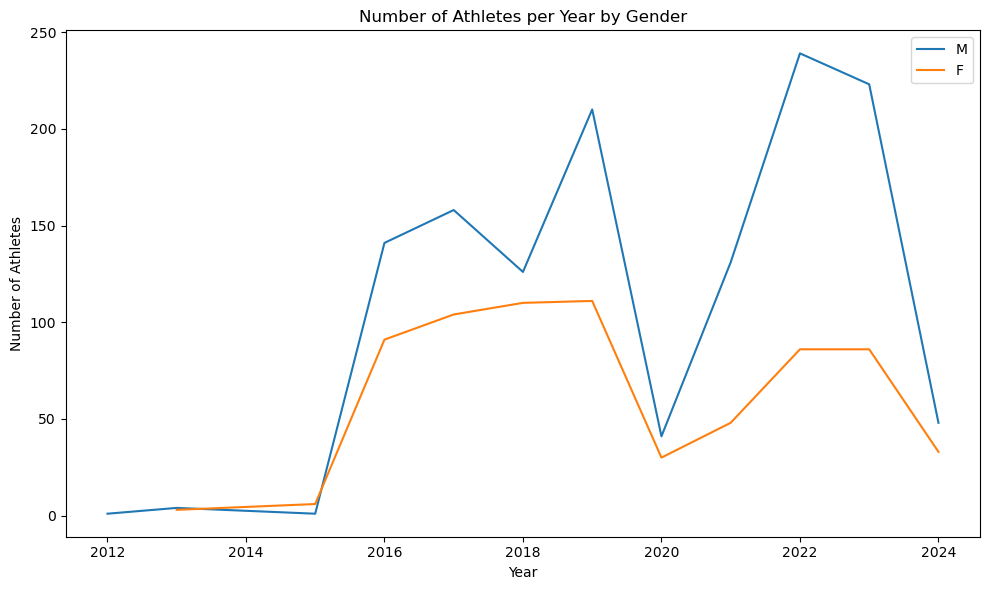

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by year, gender, and age class, and count the number of entries in each group
athletes_per_year_gender = merged_table.groupby(['Year', 'Sex']).size().reset_index(name='Count')

# Display the number of athletes per year by gender
print(athletes_per_year_gender)

# Line Plot
plt.figure(figsize=(10, 6))
for gender in ['M', 'F']:
    subset = athletes_per_year_gender[athletes_per_year_gender['Sex'] == gender]
    plt.plot(subset['Year'], subset['Count'], label=gender)
plt.title('Number of Athletes per Year by Gender')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend()
#plt.grid(True)
plt.tight_layout()
plt.show()



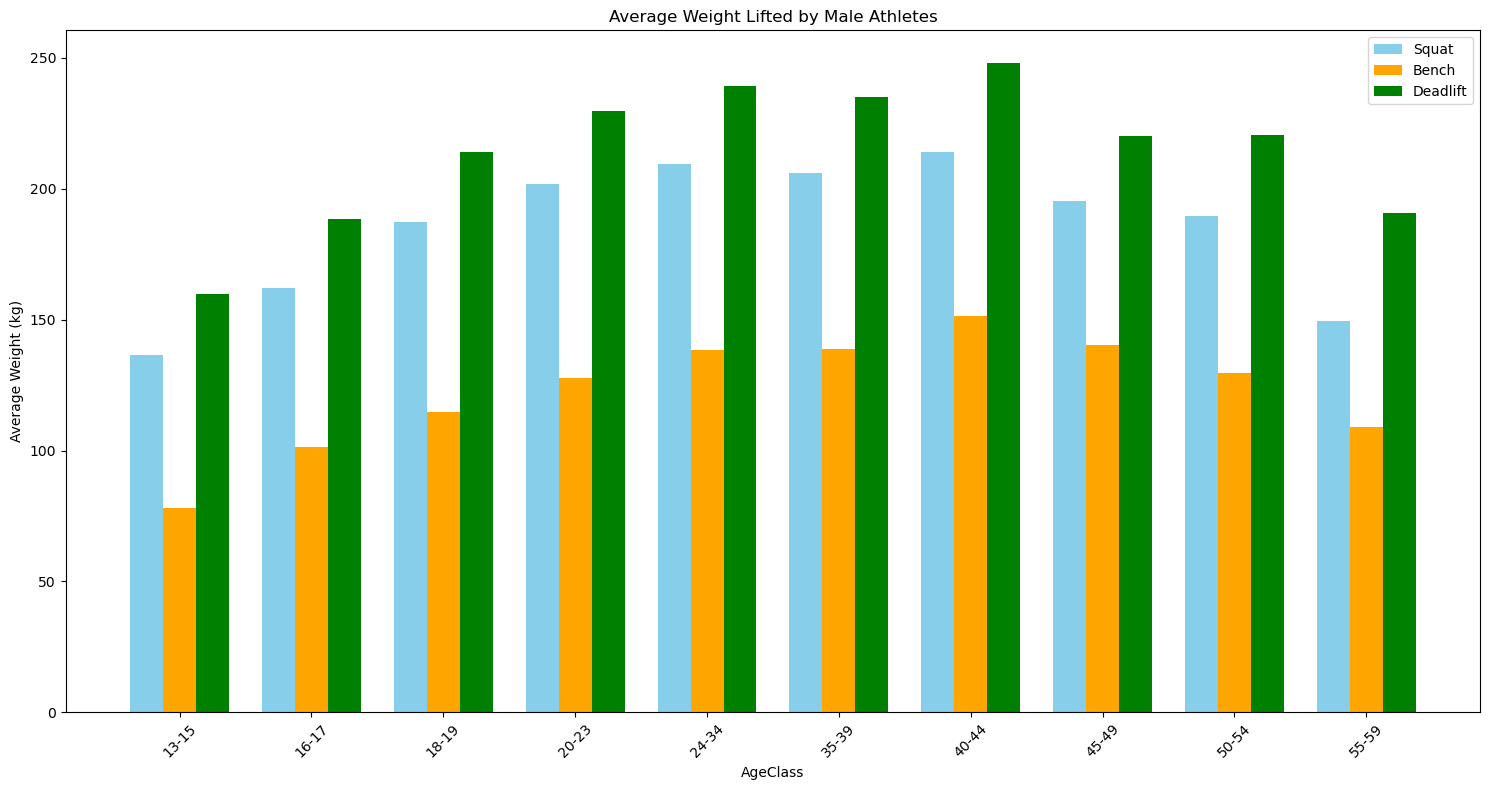

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Delete rows where 'AgeClass' is blank
merged_table.dropna(subset=['AgeClass'], inplace=True)

# Filter male athletes
male_athletes = merged_table[merged_table['Sex'] == 'M']

# Calculate the average of 'Best3SquatKg', 'Best3BenchKg', and 'Best3DeadliftKg' for male athletes
male_avg_squat = male_athletes.groupby('AgeClass')['Best3SquatKg'].mean()
male_avg_bench = male_athletes.groupby('AgeClass')['Best3BenchKg'].mean()
male_avg_deadlift = male_athletes.groupby('AgeClass')['Best3DeadliftKg'].mean()

# Get all unique AgeClasses
all_age_classes = sorted(set(male_avg_squat.index) | set(male_avg_bench.index) | set(male_avg_deadlift.index))

# Reindex average series with all AgeClasses
male_avg_squat = male_avg_squat.reindex(all_age_classes, fill_value=0)
male_avg_bench = male_avg_bench.reindex(all_age_classes, fill_value=0)
male_avg_deadlift = male_avg_deadlift.reindex(all_age_classes, fill_value=0)

# Create positions for the bars
x = range(len(all_age_classes))

# Set the width of the bars
bar_width = 0.25

plt.figure(figsize=(15, 8))  # Set the figure size
# Plot bars for male athletes_squat
plt.bar(x, male_avg_squat.values, width=bar_width, color='skyblue', label='Squat', align='center')

# Plot bars for male athletes_bench
plt.bar([i + bar_width for i in x], male_avg_bench.values, width=bar_width, color='orange', label='Bench', align='center')

# Plot bars for male athletes_deadlift
plt.bar([i + bar_width * 2 for i in x], male_avg_deadlift.values, width=bar_width, color='green', label='Deadlift', align='center')

# Add labels and title
plt.title('Average Weight Lifted by Male Athletes')
plt.xlabel('AgeClass')
plt.ylabel('Average Weight (kg)')
plt.xticks([i + bar_width for i in x], all_age_classes, rotation=45)  # Set x-axis tick positions and labels

# Add legend
plt.legend()

plt.tight_layout()
plt.show()


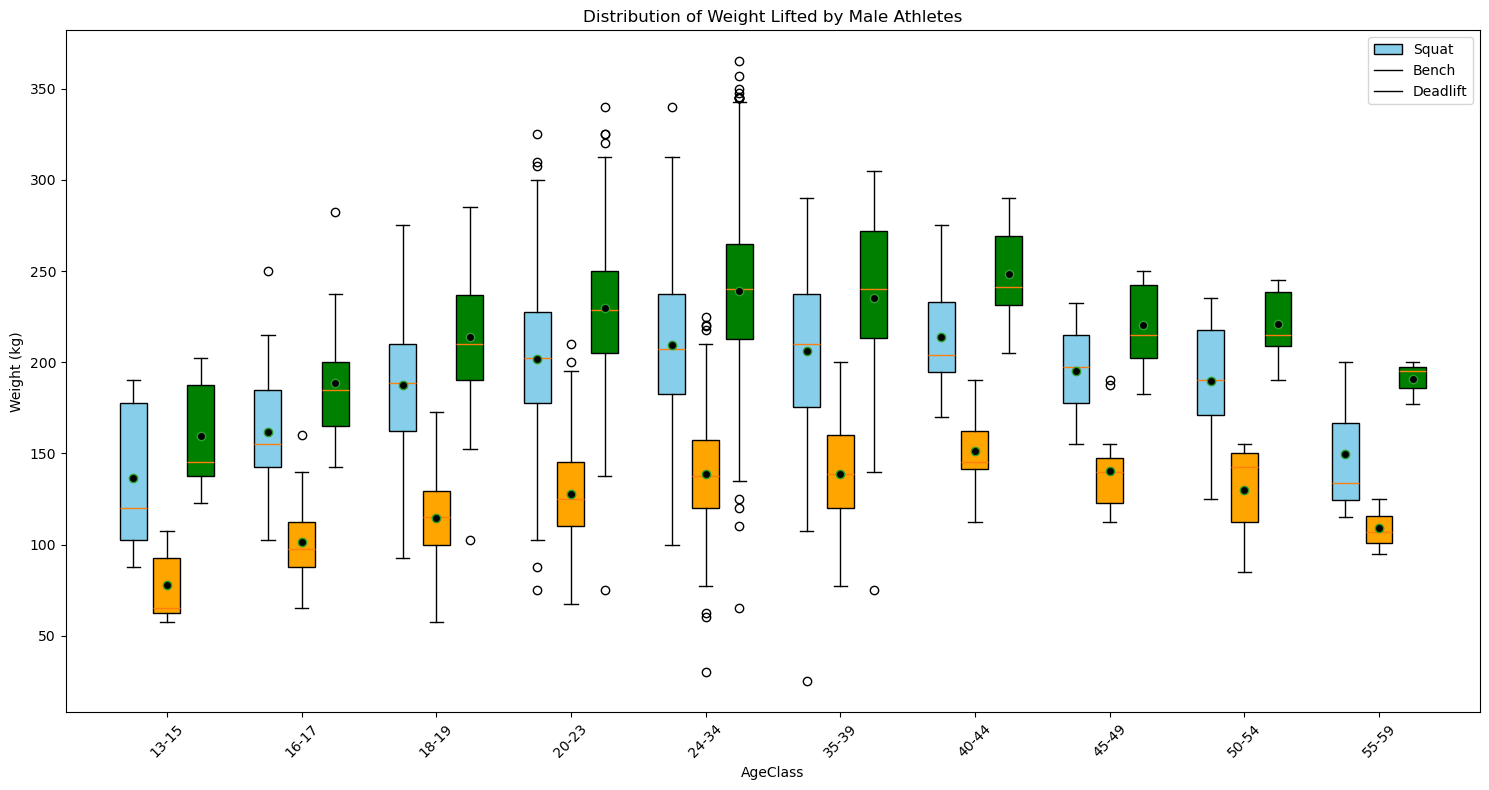

In [12]:
# Work in Progress

import matplotlib.pyplot as plt
import pandas as pd

# Delete rows where 'AgeClass' is blank
merged_table.dropna(subset=['AgeClass'], inplace=True)

# Filter male athletes
male_athletes = merged_table[merged_table['Sex'] == 'M']

# Extract data for each lift type
squat_data = male_athletes.groupby('AgeClass')['Best3SquatKg'].apply(list)
bench_data = male_athletes.groupby('AgeClass')['Best3BenchKg'].apply(list)
deadlift_data = male_athletes.groupby('AgeClass')['Best3DeadliftKg'].apply(list)

# Create positions for the boxplots
x = range(len(squat_data))

plt.figure(figsize=(15, 8))  # Set the figure size

# Create boxplots for each lift type
plt.boxplot(squat_data.values, positions=[i - 0.25 for i in x], widths=0.2, patch_artist=True, boxprops=dict(facecolor='skyblue'), showfliers=True, showmeans=True, meanprops=dict(marker='o', markerfacecolor='black', markersize=6))
plt.boxplot(bench_data.values, positions=x, widths=0.2, patch_artist=True, boxprops=dict(facecolor='orange'), showfliers=True, showmeans=True, meanprops=dict(marker='o', markerfacecolor='black', markersize=6))
plt.boxplot(deadlift_data.values, positions=[i + 0.25 for i in x], widths=0.2, patch_artist=True, boxprops=dict(facecolor='green'), showfliers=True, showmeans=True, meanprops=dict(marker='o', markerfacecolor='black', markersize=6))

# Add labels and title
plt.title('Distribution of Weight Lifted by Male Athletes')
plt.xlabel('AgeClass')
plt.ylabel('Weight (kg)')
plt.xticks(x, squat_data.index, rotation=45)  # Set x-axis tick positions and labels

# Add legend
plt.legend(['Squat', 'Bench', 'Deadlift'])

plt.tight_layout()
plt.show()
